In [8]:
# Machine Learning Final
# Connor Hehn and John Minogue

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [9]:
# Reading the data into data frames

df_1E = pd.read_csv("Data/Subject01E.csv")
df_1G = pd.read_csv("Data/Subject01G.csv")

df_2E = pd.read_csv("Data/Subject02E.csv")
df_2G = pd.read_csv("Data/Subject02G.csv")

df_3E = pd.read_csv("Data/Subject03E.csv")
df_3G = pd.read_csv("Data/Subject03G.csv")

df_4E = pd.read_csv("Data/Subject04E.csv")
df_4G = pd.read_csv("Data/Subject04G.csv")

df_5E = pd.read_csv("Data/Subject05E.csv")
df_5G = pd.read_csv("Data/Subject05G.csv")

df_6E = pd.read_csv("Data/Subject06E.csv")
df_6G = pd.read_csv("Data/Subject06G.csv")

df_7E = pd.read_csv("Data/Subject07E.csv")
df_7G = pd.read_csv("Data/Subject07G.csv")

df_8E = pd.read_csv("Data/Subject08E.csv")
df_8G = pd.read_csv("Data/Subject08G.csv")

df_9E = pd.read_csv("Data/Subject09E.csv")
df_9G = pd.read_csv("Data/Subject09G.csv")

df_10E = pd.read_csv("Data/Subject10E.csv")
df_10G = pd.read_csv("Data/Subject10G.csv")

In [10]:
# Need to fix null values

df_1G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Grounded           500 non-null    int64  
 1   Time[secs]         500 non-null    float64
 2   Forefoot Force[N]  500 non-null    float64
 3   Midfoot Force[N]   500 non-null    float64
 4   Heel Force[N]      500 non-null    float64
 5   TForce[N]          500 non-null    float64
 6   RAnkleFlexion      500 non-null    float64
 7   RAnkleInversion    500 non-null    float64
 8   RAnkleAbduction    500 non-null    float64
 9   Person             500 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 39.2 KB


In [11]:
# Merging all the dataframes into one dataframe
frame = [df_1E, df_1G, df_2E, df_2G, df_3E, df_3G, df_4E, df_4G, df_5E, df_5G, df_6E, df_6G, df_7E, df_7G, df_8E, df_8G, df_9E, df_9G, df_10E, df_10G]
main_dataframe = pd.concat(frame)


# --------------------------------------------------
# Creating a new dataframe with the average values
main_mean = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].mean()
main_mean = main_mean.add_suffix(" Avg")

for i in range(len(main_mean)):
    main_mean['Person'] = main_mean['Person Avg']
    main_mean['Grounded'] = main_mean['Grounded Avg']

# Dropping unecessary columns
main_mean = main_mean.drop(columns = 'Person Avg')
main_mean = main_mean.drop(columns = 'Grounded Avg')
main_mean = main_mean.drop(columns = 'Time[secs] Avg')


# --------------------------------------------------
# Creating a new dataframe with the min values
main_min = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].min()
main_min = main_min.add_suffix(" Min")

for i in range(len(main_min)):
    main_min['Person'] = main_min['Person Min']
    main_min['Grounded'] = main_min['Grounded Min']

# Dropping uncessary columns
main_min = main_min.drop(columns = 'Person Min')
main_min = main_min.drop(columns = 'Grounded Min')
main_min = main_min.drop(columns = 'Time[secs] Min')


# --------------------------------------------------
# Creating a new dataframe with the max values
main_max = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].max()
main_max = main_max.add_suffix(" Max")

for i in range(len(main_max)):
    main_max['Person'] = main_max['Person Max']
    main_max['Grounded'] = main_max['Grounded Max']

# Dropping uncessary columns
main_max = main_max.drop(columns = 'Person Max')
main_max = main_max.drop(columns = 'Grounded Max')
main_max = main_max.drop(columns = 'Time[secs] Max')


# --------------------------------------------------
# Creating a new dataframe with the std values
main_std = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].std()
main_std = main_std.add_suffix(" Std")

# for i in range(len(main_std)):
#     main_std['Person'] = main_std['Person Std']
#     main_std['Grounded'] = main_std['Grounded Std']

# Dropping uncessary columns
main_std = main_std.drop(columns = 'Person Std')
main_std = main_std.drop(columns = 'Grounded Std')
main_std = main_std.drop(columns = 'Time[secs] Std')


In [12]:
# Initializing the main datafram with the mean data
df = main_mean

# Adding the max values to the main dataframe
for col in main_max.columns:
    df[col] = main_max[col]

# Adding the min values to the main dataframe
for col in main_min.columns:
    df[col] = main_min[col]

# Adding the std values to the main dataframe
for col in main_std.columns:
    df[col] = main_std[col]

# Showing that all the columns are there

In [13]:
# Logistic Regression Model

total_score = 0
for i in range(10):
    # Creating the test dataset
    test = df.loc[df['Person']==(i+1)]
    # Creating y_test
    y_test = test.Grounded
    # Creating x_test and dropping target and index
    x_test = test.drop(columns='Grounded')
    x_test = x_test.drop(columns='Person')


    # Creating the train dataset
    train = df.loc[df['Person']!=(i+1)]
    # Creating y_train
    y_train = train.Grounded
    # Creting x_train and dropping target and index
    x_train = train.drop(columns='Grounded')
    x_train = x_train.drop(columns='Person')


    clf = LogisticRegression()

    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)

    score = clf.score(x_test,y_test)
    total_score += score
    conf = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(conf,index = [0,1],columns=[0,1])

    # Confusion Matrix
    # cm = confusion_matrix(y_test, pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()

    # Accuracy 
    print('\nAccuracy Score: ' , accuracy_score(y_test,pred)*100 , '%\n' )

    # F-1 Score
    print('F1 Score: ' , f1_score(y_test, pred, average='macro'))


total_score = total_score/10
print(total_score)


Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0
1.0


[0.7, 0.8, 0.9, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


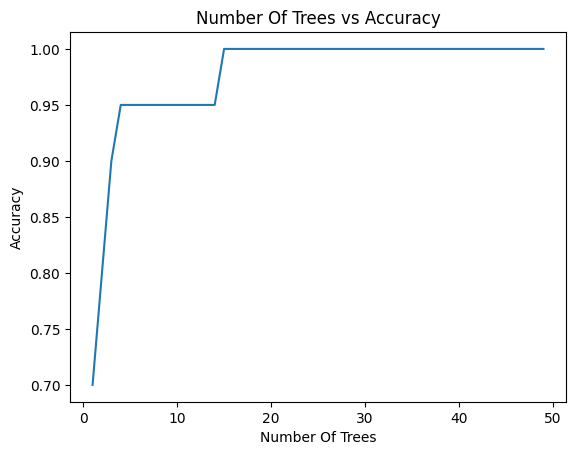

In [14]:
# Random Forest

total_score = 0
number_trees = list(range(1,50))
trees_score = []

for x in number_trees:
    total_score = 0
    for i in range(10):
        # Creating the test dataset
        test = df.loc[df['Person']==(i+1)]
        # Creating y_test
        y_test = test.Grounded
        # Creating x_test and dropping target and index
        x_test = test.drop(columns='Grounded')
        x_test = x_test.drop(columns='Person')


        # Creating the train dataset
        train = df.loc[df['Person']!=(i+1)]
        # Creating y_train
        y_train = train.Grounded
        # Creting x_train and dropping target and index
        x_train = train.drop(columns='Grounded')
        x_train = x_train.drop(columns='Person')


        clf = RandomForestClassifier(n_estimators=x,random_state=1)

        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)

        score = clf.score(x_test,y_test)
        total_score += score
        conf = confusion_matrix(y_test, pred)
        df_cm = pd.DataFrame(conf,index = [0,1],columns=[0,1])

    total_score = total_score/10
    trees_score.append(total_score)
    
print(trees_score)

plt.plot(number_trees,trees_score)
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.title("Number Of Trees vs Accuracy")
plt.show()